## <span style="color:blue">  Numerical exercises 1</span>


### Esercizio 01.1
#### Test del generatore di numeri psuedo-casuali


##### 1. Test of the Pseudo-Random Number generator

To verify the efficiency of the Pseudo-Random Number generator downloaded for the NSL Ariel website we have to verify that the mean value of the extracted numbers converges to 1/2 and their standard deviation converges to 1/12.
To do this we evaluate the mean value of the numbers extracted using the block average.
We extract $ M = 10^5$ numbers for the generator and we divide the M extractions in N = 100 block, we perform the average for each block, we call these averages $A_i$ with $i = 1, ..., N$. We evaluate also $A_i^2$. So we evaluate:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
and the statistical uncertainty with $N$ :
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

Then we plot the value of the progressive average in function of the numebers of throws, obtaining the first graph:

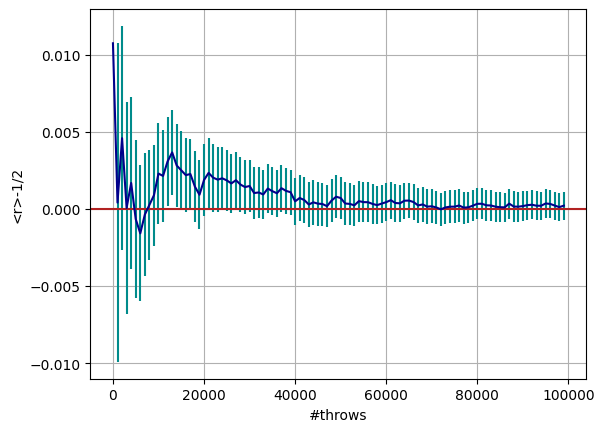

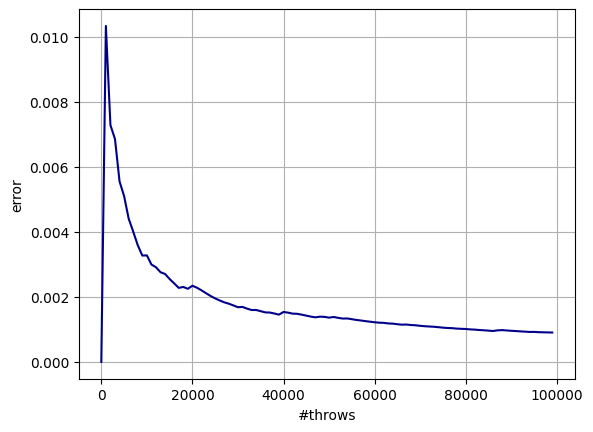

In [8]:
# mean value of r - 1/2 as a function of the number of throws
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data = np.loadtxt("es1_1/data.dat")
x = data[:,0]
y = data[:,1]
err = data[:,2]

plt.errorbar(x,y,err, ecolor= 'darkcyan' ,color='darkblue')
plt.axhline(y=0, color='firebrick', linestyle='-')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)

plt.figure(2)
plt.plot(x, err, color='darkblue')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)


plt.show()

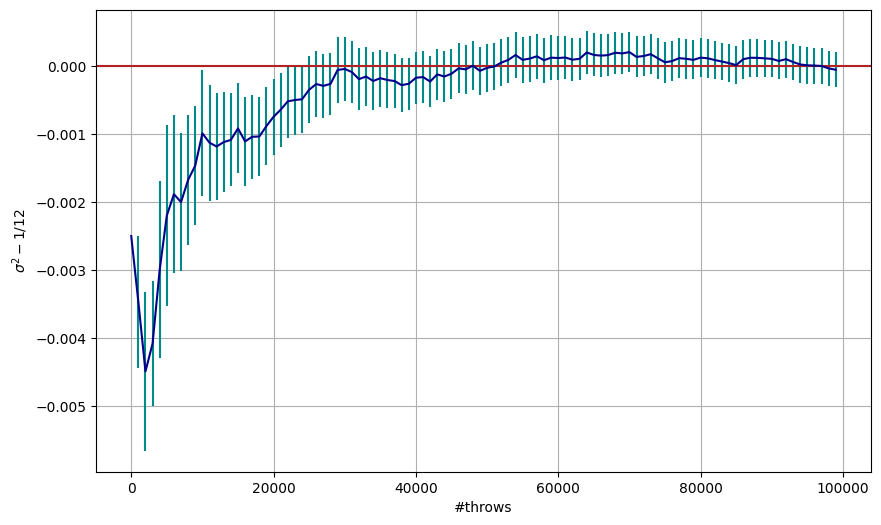

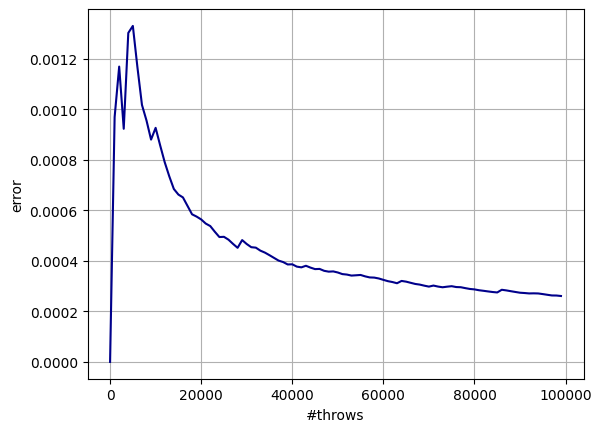

In [1]:
#mean value of (r-1/2)^2 as a function of the number of throws
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_sigma = np.loadtxt("es1_1/data_sigma.dat")
x1 = data_sigma[:,0]
y1 = data_sigma[:,1]
err1 = data_sigma[:,2]

plt.figure(1,figsize=(10, 6))
plt.errorbar(x1,y1,err1, ecolor= 'darkcyan' ,color='darkblue')
plt.axhline(y=0, color='firebrick', linestyle='-')

plt.xlabel('#throws')
plt.ylabel('$\sigma^2-1/12$')
plt.grid(True)


plt.figure(2)
plt.plot(x1, err1, color='darkblue')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)


plt.show()

#### $\chi^2$ test 
We want to demonstrate that the extracted numebrs follow a uniform distribution. We evaluate the error between the observaed and the expected value using a $\chi^2$ test. To do this we divide the interval [0,1] in M identical sub-intervals and we implement the $\chi^2$ test. According to a uniform distribution the number of exected events observed in each sub-interval after $n$ throws is $n/M$. So the $\chi^2$ statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.

To implement this calculation we extract n random numbers and we check in which of the M interval they fall using a "for cycle", then we evalueate the $\chi^2$. We repeat this for 100 times using another "for cycle" and we plot an histogram with the $\chi^2$ obtained. We compare the histogram with the expected value that is $\chi^2 = 100$ (perchè il chi^2 ridotto tende a 1 ma è chi/numero di gradi di liberta che in questo caso sono M =100, numero di intervalli).


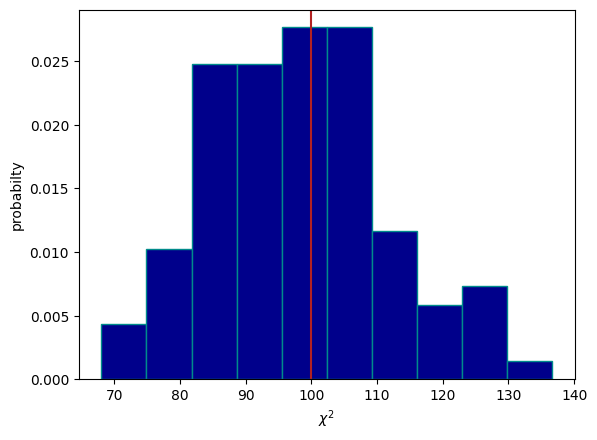

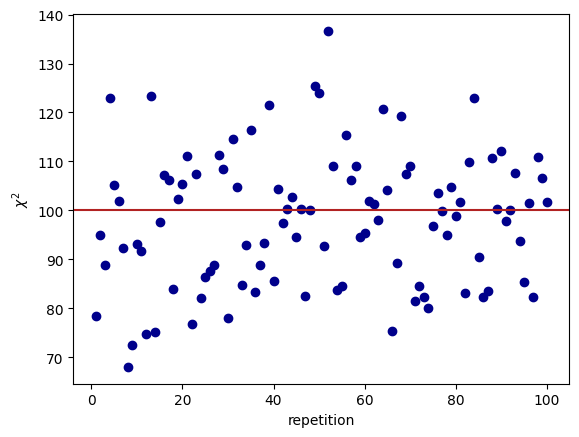

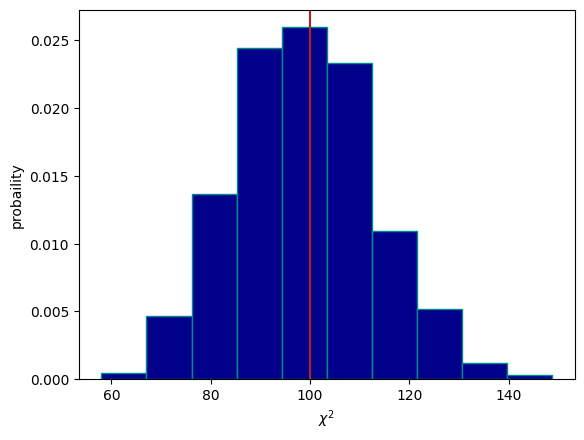

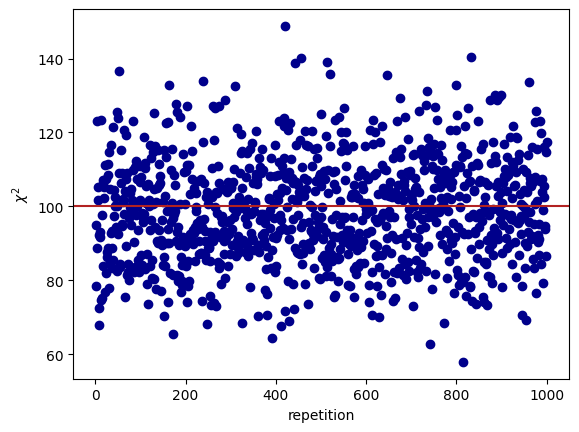

In [2]:
# ho fatto la simulazione con 100 blocchi e 100000 throws per blocco
# lui la chievava con 100 blocchi e 10000 throws per blocco
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#chi test with 100 repetitions
chi_test = np.loadtxt("es1_1/chi_test.dat")  #carico i dati del chi test
j = chi_test[:,0]
x = chi_test[:,1]
plt.figure(1)
plt.hist(x, bins = 10, edgecolor= 'darkcyan', color='darkblue', density=True)
plt.xlabel('$\chi^2$')
plt.ylabel('probabilty')
plt.axvline(x=100, color='firebrick', linestyle='-')

plt.figure(2)
plt.scatter(j,x, color='darkblue')
plt.xlabel('repetition')
plt.ylabel('$\chi^2$')
plt.axhline(y=100, color='firebrick', linestyle='-')
#plt.grid(True)
plt.show()

#chi test with 1000 repetitions
chi_test = np.loadtxt("es1_1/chi_test_2.dat")  #carico i dati del chi test
j_2 = chi_test[:,0]
x_2 = chi_test[:,1]
plt.figure(1)
plt.hist(x_2, bins = 10, edgecolor= 'darkcyan', color='darkblue', density=True)
plt.xlabel('$\chi^2$')
plt.ylabel('probaility')
plt.axvline(x=100, color='firebrick', linestyle='-')

plt.figure(2)
plt.scatter(j_2,x_2, color='darkblue')
plt.xlabel('repetition')
plt.ylabel('$\chi^2$')
plt.axhline(y=100, color='firebrick', linestyle='-')
#plt.grid(True)
plt.show()

### Esercizio 01.2
Aggiungiamo nel file random.cpp l'implementazione dell'estrazione pseudo-casuale che segue la distribuzione esponenziale e quella di Cauchy-Lorentz. 
facciamo per ogni tipo di generatore delle simulazioni che estraggano N= 1, 2, 10, 100 numeri casuali per $10^4$ volte e li mettiamo in degli istogrammi.
fittiamo le distribuzioni che otteniamo per N = 100 con delle gaussiane per l'esponeziale e l'estrazione uniforme e con una lorenziana per il generatore che segue la distribuzione di Lorentz.



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import seaborn as sns

histo1 = np.loadtxt("es1_2/histo1.dat") 
histo2 = np.loadtxt("es1_2/histo2.dat") 
histo10 = np.loadtxt("es1_2/histo10.dat") 
histo100 = np.loadtxt("es1_2/histo100.dat") 
# Definiamo la funzione gaussiana
def gauss(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x-mu) / sigma) ** 2)
# definiamo la funzione lorentziana
def lorentziana(x, A, mu, gamma):
    return A* gamma / (math.pi * ((gamma)**2 + (x - mu) ** 2))

[13.77552307  0.50002138 -0.02897114]


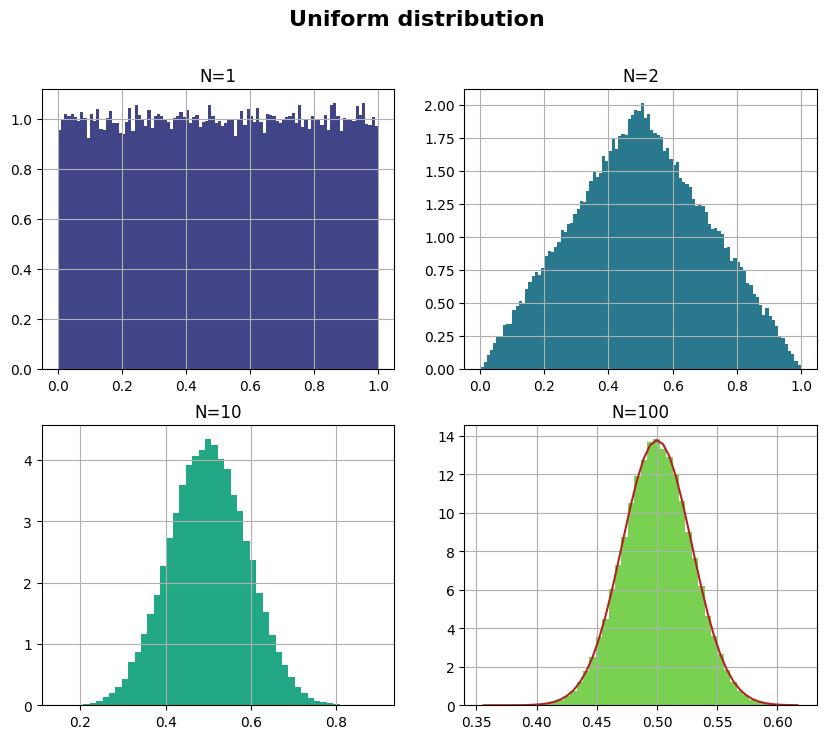

In [4]:
# uniform distribution
unif1= histo1[:,0]
unif2 = histo2[:,0]
unif10 = histo10[:,0]
unif100 = histo100[:,0]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Uniform distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(unif1, bins=100, color=colors[0], density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(unif2, bins=100, color=colors[1], density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(unif10, bins=50, color=colors[2], density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n1, bins1, _ = axs[1,1].hist(unif100, bins=50, color=colors[3], density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit gaussiano per N = 100
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
popt1, pcov1 = curve_fit(gauss, bin_centers1, n1)
plt.plot(bin_centers1, gauss(bin_centers1, *popt1), color='firebrick', label='fit')
print(popt1)
plt.grid(True)

[ 4.01409171  0.99530994 -0.09916635]


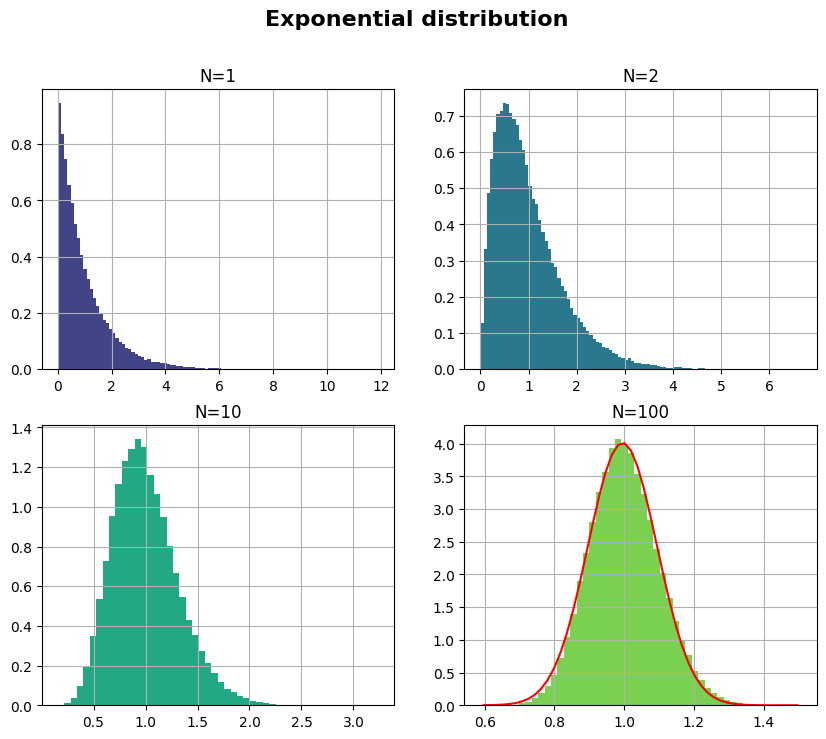

In [5]:
#exponential distribution
exp1= histo1[:,1]
exp2 = histo2[:,1]
exp10 = histo10[:,1]
exp100 = histo100[:,1]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Exponential distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(exp1, bins=100, color=colors[0], density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(exp2, bins=100, color=colors[1], density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(exp10, bins=50, color=colors[2], density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n2, bins2, _ = axs[1,1].hist(exp100, bins=50, color=colors[3], density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit gaussiano per N = 100
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
popt2, pcov2 = curve_fit(gauss, bin_centers2, n2)
plt.plot(bin_centers2, gauss(bin_centers2, *popt2), color='r', label='fit')
print(popt2)
plt.grid(True)

plt.show()

[1.06765173 0.00701609 1.00624247]


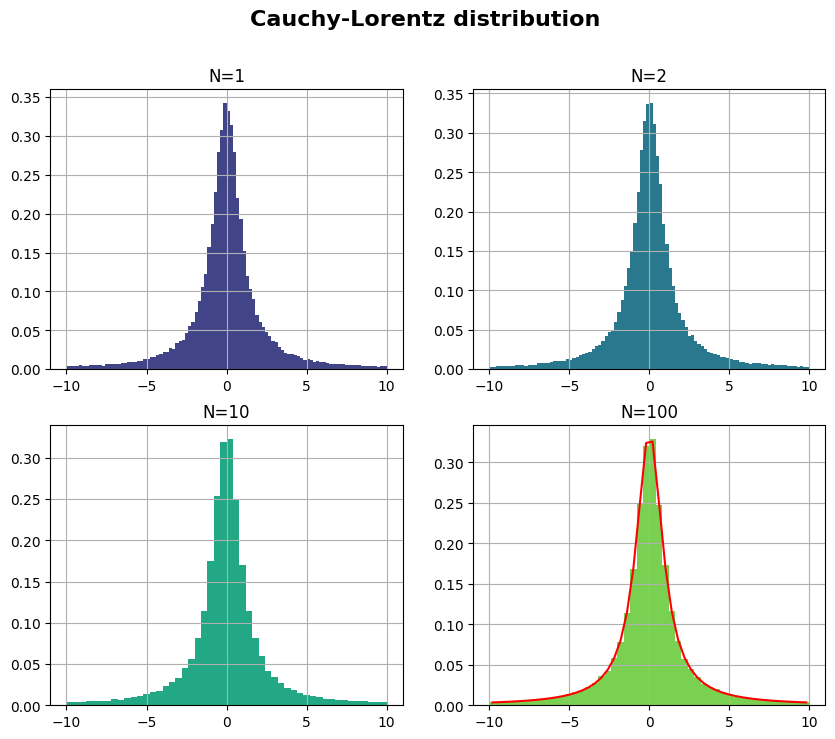

In [6]:
# lorentzian distribution
import matplotlib.pyplot as plt
import numpy as np
import math


lor1= histo1[:,2]
lor2 = histo2[:,2]
lor10 = histo10[:,2]
lor100 = histo100[:,2]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Cauchy-Lorentz distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(lor1, bins=100, color=colors[0], range=(-10, 10), density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(lor2, bins=100, color=colors[1], range=(-10, 10),density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(lor10, bins=50, color=colors[2], range=(-10, 10),density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n3, bins3, _ = axs[1,1].hist(lor100, bins=50, color=colors[3], range=(-10, 10),density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit lrentziano per N = 100
bin_centers3 = (bins3[:-1] + bins3[1:]) / 2
popt3, pcov3 = curve_fit(lorentziana, bin_centers3, n3)
plt.plot(bin_centers3, lorentziana(bin_centers3, *popt3), color='r', label='fit')
print(popt3)

plt.show()

## Esercizio 1.3
Esperimento di Buffon per valutare $\pi$.

estraiamo la posizione del centro dell'ago (x) come numero casuale distribuito uniformemente tra 0 e d/2 e dell'angolo di inclinazione della sbarretta (theta) tra 0 e pigreco e controlliamo che $x <= L/2*sin(theta)$, dove L = lunghezza dell'ago. Contiamo le volte in cui la sbarretta tocca una linea. 

Facciamo la media a blocchi: dividiamo gli M lanci della barretta in N blocchi, per ogni blocco troviamo un valore di pigreco e poi prograssivamente facciamo la media e plottiamo il valor medio all'aumentare del numero di blocchi.

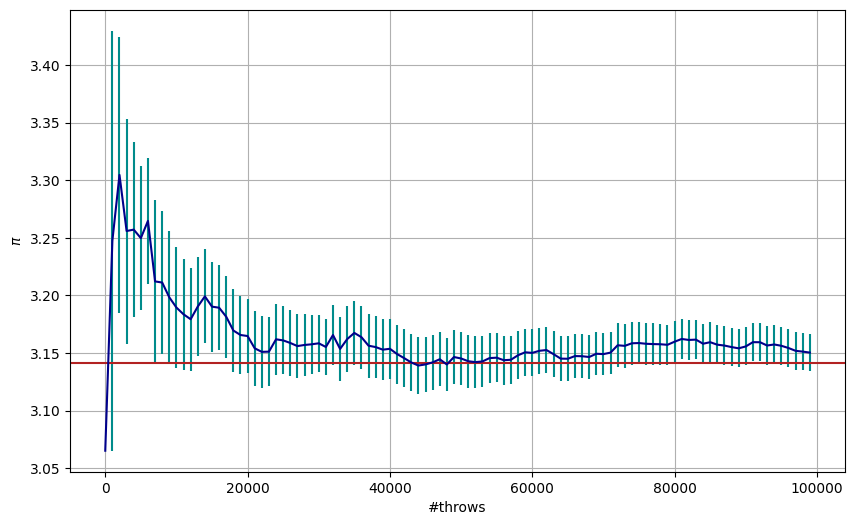

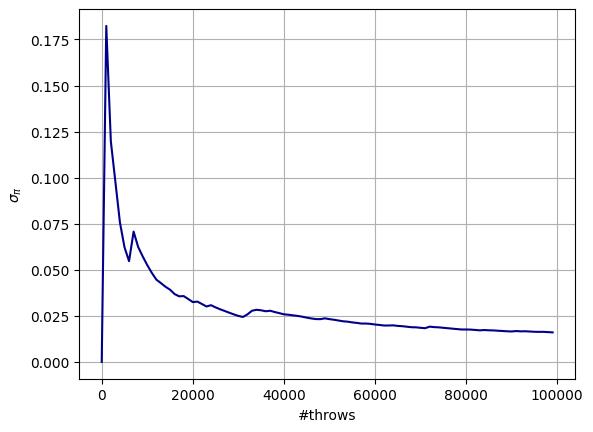

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

pi_estimation = np.loadtxt("/home/catezac/laboSN/ES1/es1_3/pi_estimation.dat")
N = pi_estimation[:,0]
p = pi_estimation[:,1]
err = pi_estimation[:,2]

plt.figure(1,figsize=(10, 6))
plt.errorbar(N, p, err, color = 'darkblue', ecolor='darkcyan')
plt.axhline(y=math.pi, color='firebrick', linestyle='-')
plt.xlabel('#throws')
plt.ylabel('$\pi$')
plt.grid(True)

plt.figure(2)
plt.plot(N, err, color='darkblue')
plt.xlabel('#throws')
plt.ylabel('$\sigma_{\pi}$')


plt.grid(True)
plt.show()